In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stockdata as sd

In [51]:
df = pd.read_csv('data/202101-202204.csv')
df['SeasonIncomeGrowth'] = df['SeasonIncomeGrowth'].clip(lower=-10.0, upper=100.0)
df['SeasonProfitGrowth'] = df['SeasonProfitGrowth'].clip(lower=-10.0, upper=100.0)
# dfloc = df.loc[df['股票代码'] == 600079, ['iDATE', 'preYearIncome', 'SeasonIncome', 'SeasonIncomeGrowth', 'preYearProfit', 'SeasonProfit', 'SeasonProfitGrowth']]
# df.loc[df['股票代码']==2, ['iDATE', 'preYearIncome', 'SeasonIncome', 'SeasonIncomeGrowth', 'preYearProfit', 'SeasonProfit', 'SeasonProfitGrowth']]

In [57]:
dfincome = df.groupby('股票代码')['SeasonIncomeGrowth'].mean()
dfprofit = df.groupby('股票代码')['SeasonProfitGrowth'].mean()
dfgrowth = pd.merge(dfincome, dfprofit, on=['股票代码'])

dfgrowth = dfgrowth.loc[(dfgrowth['SeasonIncomeGrowth'] > 70) & (dfgrowth['SeasonProfitGrowth'] > 70)]
dfgrowth

,SeasonIncomeGrowth,SeasonProfitGrowth
股票代码,,
408,78.698108,86.250000
893,81.554018,82.113214
2129,78.226491,84.407180
2192,98.431516,100.000000
2240,77.459372,72.500000
2460,91.913245,100.000000
2466,81.536120,75.388124
2709,91.473844,96.517321
2756,71.802350,95.946250


In [53]:
df.loc[df['股票代码']==689009, ['iDATE', 'preYearIncome', 'SeasonIncome', 'SeasonIncomeGrowth', 'preYearProfit', 'SeasonProfit', 'SeasonProfitGrowth']]

,iDATE,preYearIncome,SeasonIncome,SeasonIncomeGrowth,preYearProfit,SeasonProfit,SeasonProfitGrowth
24,20210331,6.517242e+08,1.778577e+09,100.000000,1.138560e+07,2.540758e+07,100.000000
2324,20210630,2.001800e+09,2.940142e+09,100.000000,5.066161e+07,2.285331e+08,100.000000
3600,20210930,4.317854e+09,2.483766e+09,7.241266,8.500769e+07,1.343489e+08,100.000000
4205,20211231,6.002741e+09,1.943568e+09,15.353035,7.347340e+07,2.230912e+07,-10.000000
5110,20220331,1.778577e+09,1.917320e+09,7.800768,2.540746e+07,3.844657e+07,51.320000
7408,20220630,4.718719e+09,2.903166e+09,-1.257615,2.539517e+08,2.171050e+08,-5.005251
8684,20220930,7.202485e+09,2.811668e+09,13.201796,3.883002e+08,1.380683e+08,2.768782
9165,20221231,9.146054e+09,2.492164e+09,28.226211,4.106016e+08,5.693316e+07,100.000000


"\nfor i in range(len(df)):\n    # Check if the point is an outlier\n    if df.iloc[i]['SeasonIncomeGrowth'] > 85 or df.iloc[i]['SeasonProfitGrowth'] > 85 :\n        # Annotate the point with its name\n        plt.annotate(df.iloc[i]['股票代码'], (df.iloc[i]['SeasonIncomeGrowth'], df.iloc[i]['SeasonProfitGrowth']))\n\nplt.show()\n"

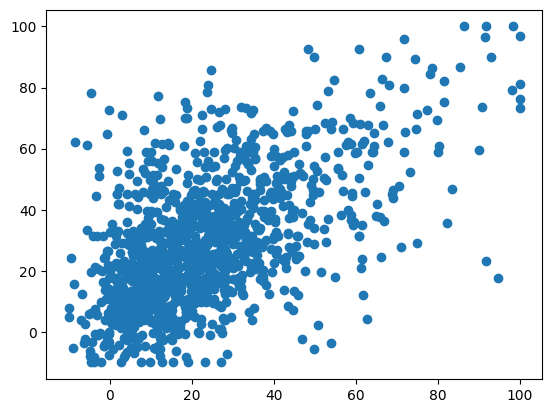

In [54]:
plt.scatter(dfgrowth['SeasonIncomeGrowth'], dfgrowth['SeasonProfitGrowth'])

"""
for i in range(len(df)):
    # Check if the point is an outlier
    if df.iloc[i]['SeasonIncomeGrowth'] > 85 or df.iloc[i]['SeasonProfitGrowth'] > 85 :
        # Annotate the point with its name
        plt.annotate(df.iloc[i]['股票代码'], (df.iloc[i]['SeasonIncomeGrowth'], df.iloc[i]['SeasonProfitGrowth']))

plt.show()
"""
